In [2]:
import pandas as pd
import numpy as np

In [3]:
def make_df(path):
    if not isinstance(path, str):
        print('⛔️ Your path must be a string')
        return
    data = pd.read_csv(path)
    return data


In [4]:
df1 = make_df('/kaggle/input/originaldata/Glassdoor Gender Pay Gap.csv')
df2 = make_df('/kaggle/input/originaldata/MOCK_DATA-_2_.csv')

In [5]:
df1.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [6]:
df2.head()

,id,gender,job,salary,country,age,smoking
0,1,Polygender,Pharmacist,2256.81,Serbia,50,1
1,2,Female,Sales Associate,1405.11,Portugal,35,0
2,3,Female,Account Representative II,2788.13,Chile,34,0
3,4,Male,Help Desk Technician,3493.03,Mongolia,41,1
4,5,Male,Account Representative IV,883.39,Indonesia,23,0


In [7]:
print(df1.shape)
print(df2.shape)

(1000, 9)
(1000, 7)


In [8]:
df1.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [11]:
print(f'Null value in Glassdoor Gender Pay Gap {df1.isnull().sum().sum()}')
print(f'Null value in Moca Data {df2.isnull().sum().sum()}')

Null value in Glassdoor Gender Pay Gap 0
Null value in Moca Data 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


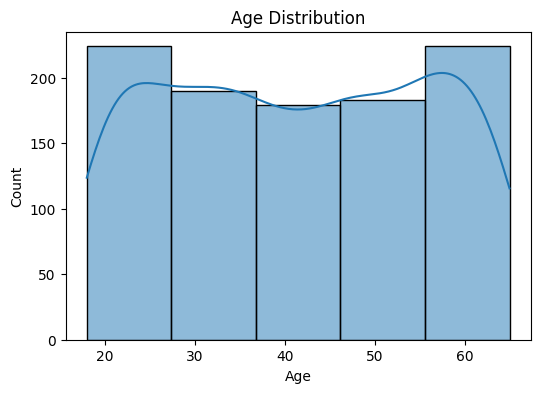

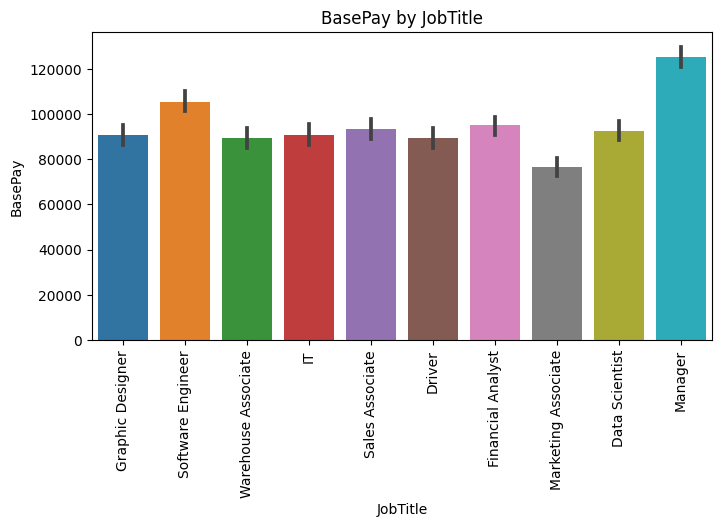

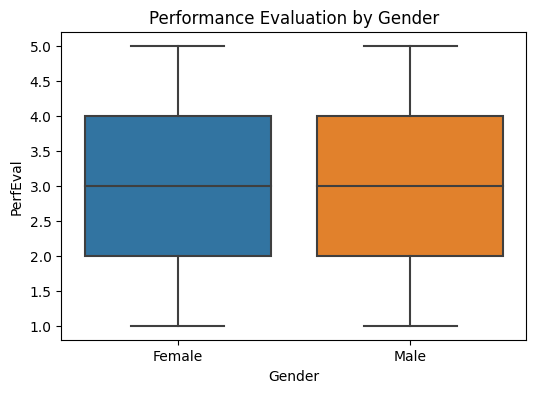

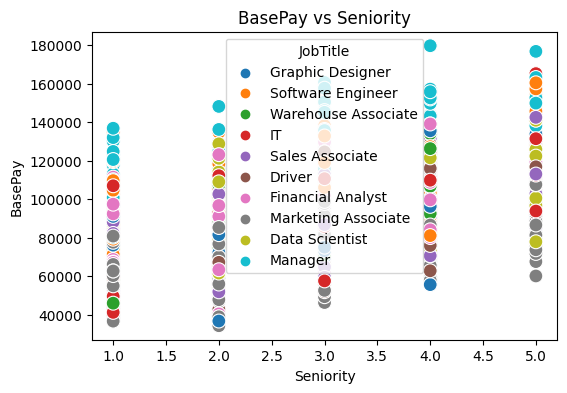

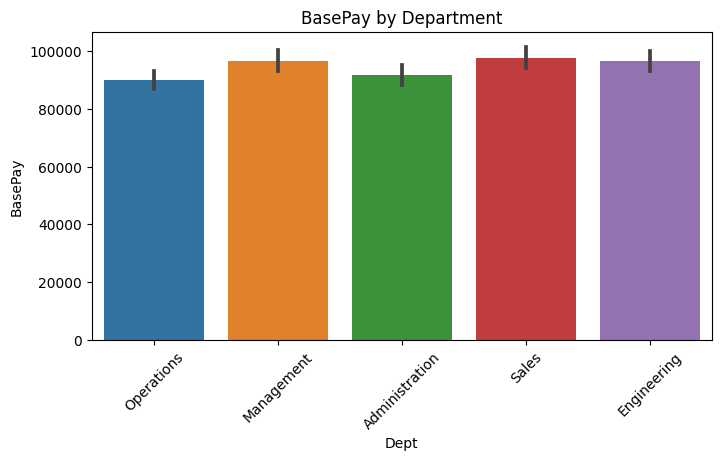

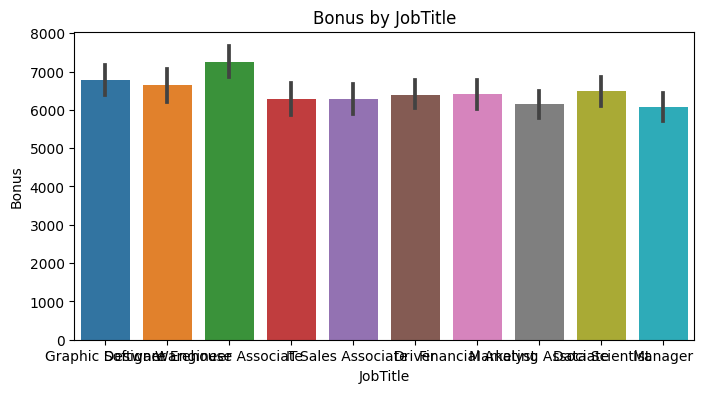

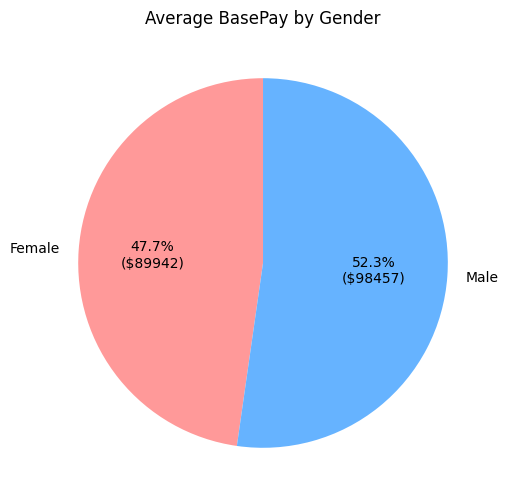

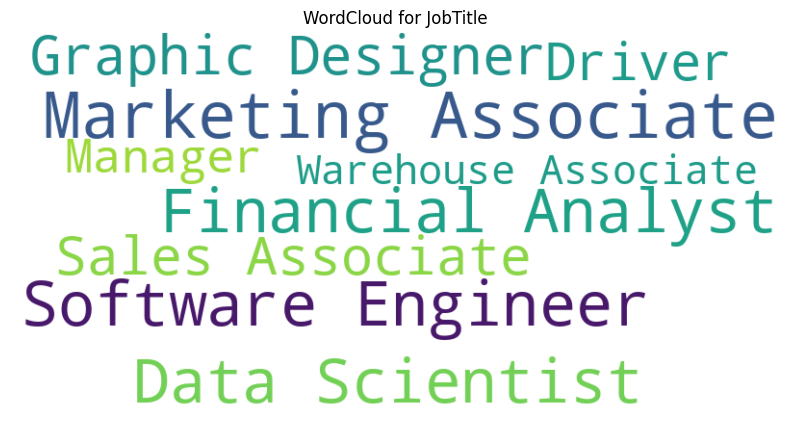

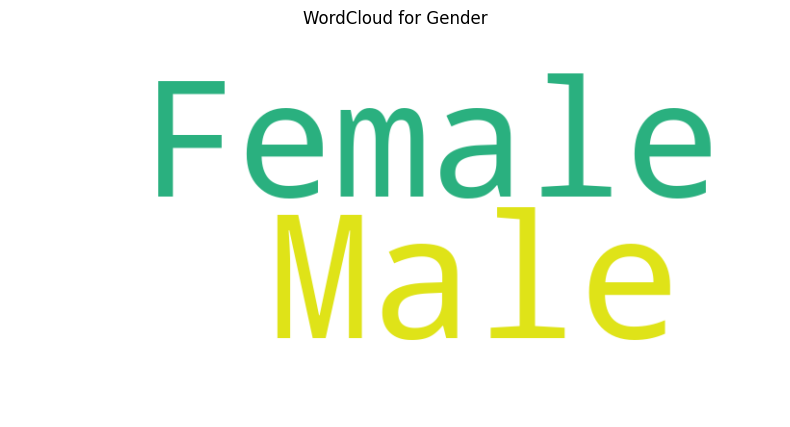

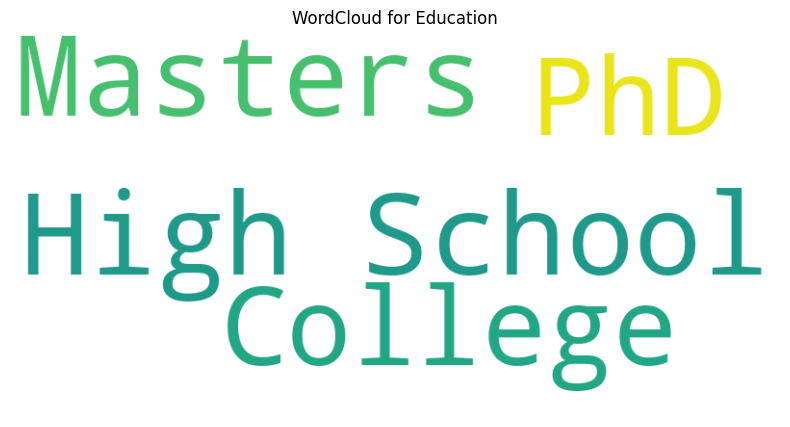

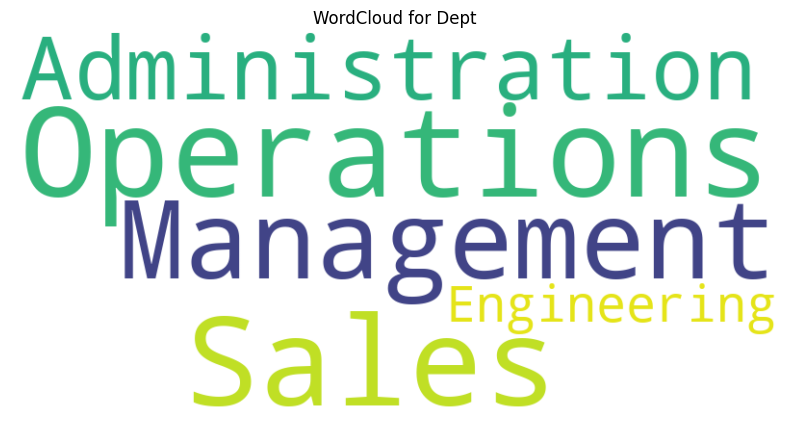

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. age
plt.figure(figsize=(6,4))
sns.histplot(df1['Age'], bins=5, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 2. base salary by job title
plt.figure(figsize=(8,4))
sns.barplot(x='JobTitle', y='BasePay', data=df1)
plt.title('BasePay by JobTitle')
plt.ylabel('BasePay')
plt.xticks(rotation=90)  # סיבוב שמות התפקידים אם הם ארוכים
plt.show()



# 3. Performance Evaluation by gender
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='PerfEval', data=df1)
plt.title('Performance Evaluation by Gender')
plt.show()

# 4. base seniority by base pay and job title
plt.figure(figsize=(6,4))
sns.scatterplot(x='Seniority', y='BasePay', hue='JobTitle', data=df1, s=100)
plt.title('BasePay vs Seniority')
plt.xlabel('Seniority')
plt.ylabel('BasePay')
plt.show()

# 5. base pay by dept
plt.figure(figsize=(8,4))
sns.barplot(x='Dept', y='BasePay', data=df1)
plt.title('BasePay by Department')
plt.ylabel('BasePay')
plt.xticks(rotation=45)
plt.show()

# 6. Bonus by JobTitle
plt.figure(figsize=(8,4))
sns.barplot(x='JobTitle', y='Bonus', data=df1)
plt.title('Bonus by JobTitle')
plt.ylabel('Bonus')
plt.show()


# 7. gender by avg salary
avg_salary_by_gender = df1.groupby('Gender')['BasePay'].mean()
plt.figure(figsize=(6,6))
colors = ['#ff9999','#66b3ff']
plt.pie(avg_salary_by_gender, labels=avg_salary_by_gender.index, autopct=lambda p: f'{p:.1f}%\n(${int(p/100*avg_salary_by_gender.sum())})', colors=colors, startangle=90)
plt.title('Average BasePay by Gender')
plt.show()


from wordcloud import WordCloud

# 8. word cloud
categorical_cols = ['JobTitle', 'Gender', 'Education', 'Dept']
for col in categorical_cols:
    text = " ".join(df1[col].astype(str))  # מחברים את כל הערכים למחרוזת אחת
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {col}')
    plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


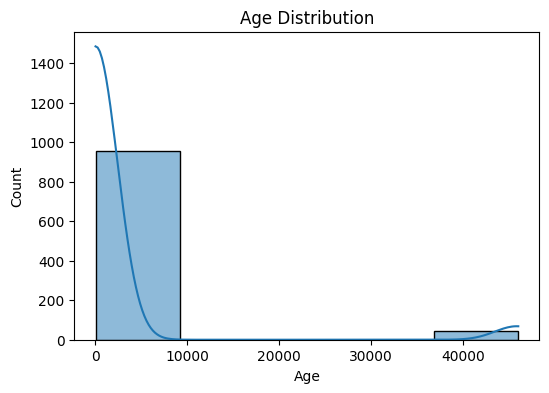

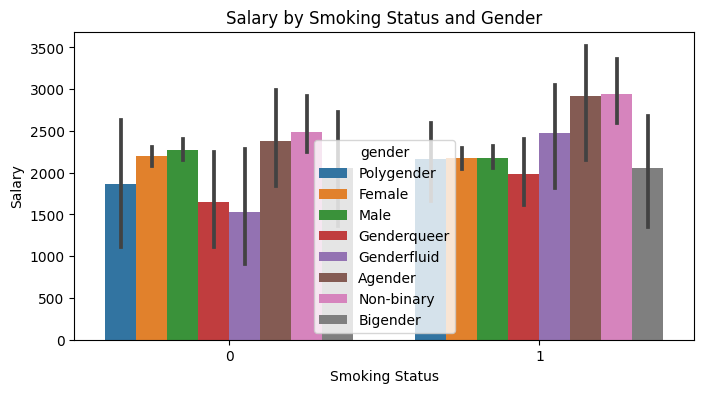

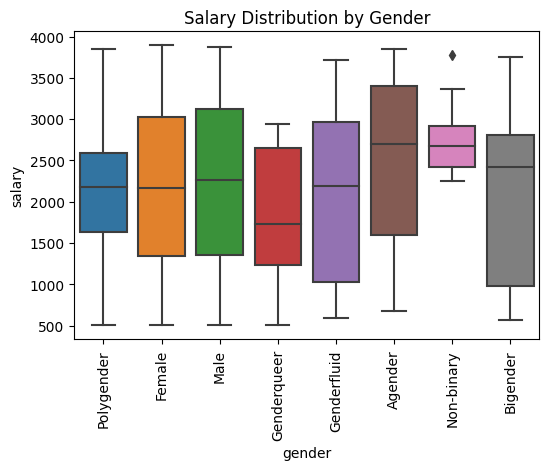

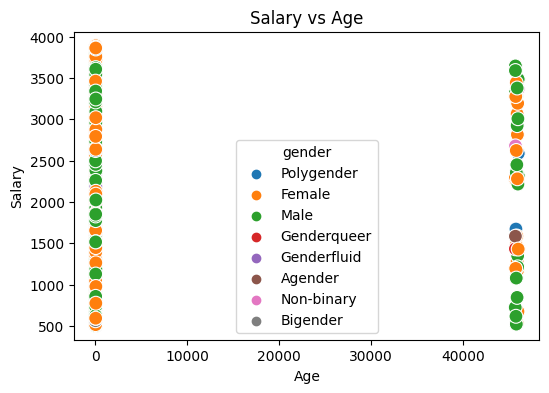

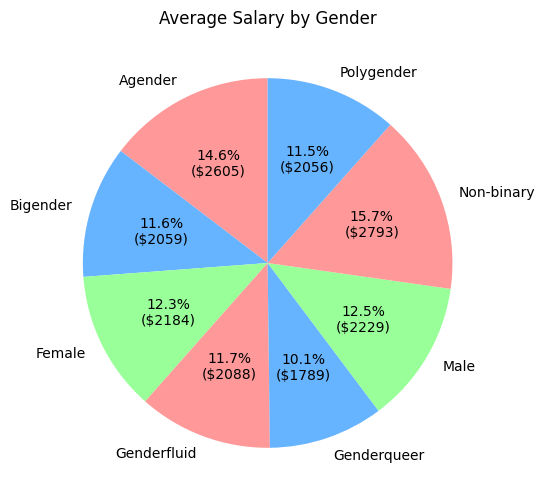

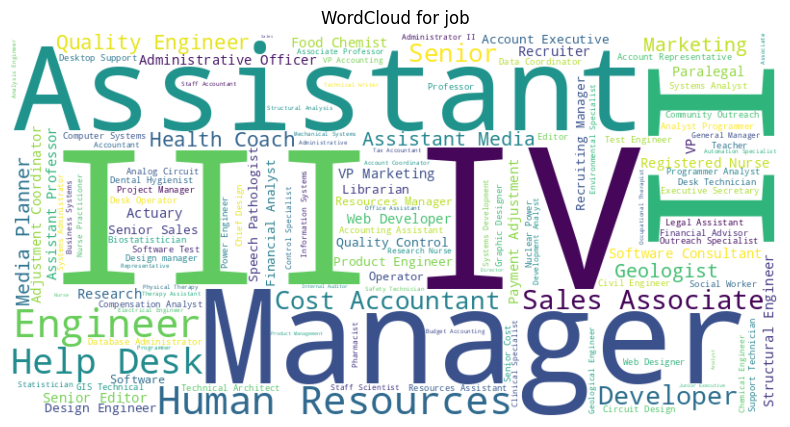

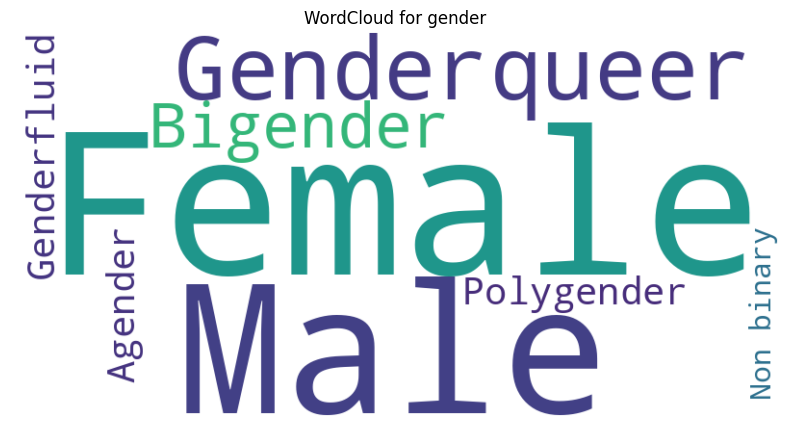

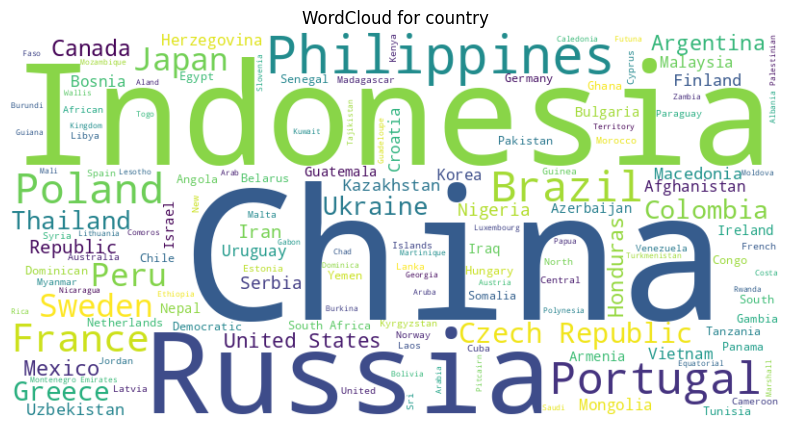

column smoking invalid
We need at least 1 word to plot a word cloud, got 0.


In [13]:

# 1. Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df2['age'], bins=5, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x='smoking', y='salary', hue='gender', data=df2)
plt.title('Salary by Smoking Status and Gender')
plt.ylabel('Salary')
plt.xlabel('Smoking Status')
plt.show()

# 3. Salary distribution by gender
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='salary', data=df2)
plt.xticks(rotation=90)  # סיבוב שמות התפקידים אם הם ארוכים
plt.title('Salary Distribution by Gender')
plt.show()

# 4. Salary vs Age by Gender
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='salary', hue='gender', data=df2, s=100)
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

# 5. Pie chart - average salary by gender
avg_salary_by_gender = df2.groupby('gender')['salary'].mean()
plt.figure(figsize=(6,6))
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(avg_salary_by_gender, labels=avg_salary_by_gender.index,
        autopct=lambda p: f'{p:.1f}%\n(${int(p/100*avg_salary_by_gender.sum())})',
        colors=colors, startangle=90)
plt.title('Average Salary by Gender')
plt.show()

# 6. WordCloud for categorical columns
categorical_cols = ['job', 'gender', 'country', 'smoking']

for col in categorical_cols:
    try:
        text = " ".join(df2[col].astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        plt.figure(figsize=(10,5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'WordCloud for {col}')
        plt.show()
    except Exception as e:
        print(f'column {col} invalid')
        print(e)
    

In [14]:
df1.columns

Index(['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept',
       'Seniority', 'BasePay', 'Bonus'],
      dtype='object')

In [15]:
df_1 = df1[['JobTitle', 'Gender', 'Age',  'Education','Seniority', 'BasePay']]

In [28]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def create_reg_model(df, features, target, test_size=0.3, scaling="mm", plot=None, prints=None):
    """
    Train a regression model with configurable normalization for numeric features.
    
    Parameters:
        df (pd.DataFrame): input dataframe
        features (list): list of feature column names
        target (str): target column name
        test_size (float): test split ratio
        scaling (str): normalization method ("mm"=MinMax, "s"=Standard, "r"=Robust, "n"=None)
        plot (bool): whether to plot Actual vs Predicted
        prints (bool): whether to print metrics
    
    Returns:
        model: trained pipeline (preprocessing + regressor)
        mse (float): mean squared error
        r2 (float): R² score
    """

    # Select features and target
    X = df[features]
    y = df[target]
    
    # Separate numerical and categorical features
    numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()
    
    # Choose normalization method
    if scaling == "mm":
        numeric_transformer = MinMaxScaler()
        scaling_name = "MinMax Scaler"
    elif scaling == "s":
        numeric_transformer = StandardScaler()
        scaling_name = "Standard Scaler"
    elif scaling == "r":
        numeric_transformer = RobustScaler()
        scaling_name = "Robust Scaler"
    elif scaling == "n":
        numeric_transformer = "passthrough"
        scaling_name = "No Scaling"
    else:
        raise ValueError("Invalid scaling option. Choose from: 'mm', 's', 'r', 'n'.")

    # Print selected scaling method
    print(f"✅ Selected scaling method: {scaling_name}")
    
    # Categorical transformer
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    
    # Combine transformers
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    
    # Pipeline with preprocessing + regression model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])
    
    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Train model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    
    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    if prints:
        metrics_df = pd.DataFrame({
    "MSE": [mse],
    "RMSE": [mse**0.5],
    "EXP (-RMSE)": [sp.exp(- mse**0.5)],
    "R²": [r2]
})
        print(metrics_df)
    if plot:
        plt.figure(figsize=(6,6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.xlabel("Real Value")
        plt.ylabel("Prediction")
        plt.title(f"Actual vs Predicted - Regression ({scaling_name})")
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.show()
    
    return model, mse, r2


In [49]:
# מילון לשמירת תוצאות
results = {}

# רשימת גודל סט בדיקה
test_sizes = np.random.uniform(0.2, 0.4, 20)

for ts in test_sizes:
    for scaleType in ['mm','r','s']:
        print(f'test Size - {ts} , Current Scale Type - {scaleType}')
        model, mse, r2 = create_reg_model(
            df_1,
            ['JobTitle', 'Gender', 'Age', 'Education','Seniority'],
            'BasePay',
            test_size=ts,
            scaling=scaleType,
            prints=True
        )
        results[ts] = {"MSE": mse, "R2": r2 , 'Scale Type' : scaleType , 'Test Size' : ts }
print(results)




test Size - 0.34571120403724676 , Current Scale Type - mm
✅ Selected scaling method: MinMax Scaler
            MSE          RMSE             EXP (-RMSE)        R²
0  1.253365e+08  11195.378545  8.10727530834744e-4863  0.807808
test Size - 0.34571120403724676 , Current Scale Type - r
✅ Selected scaling method: Robust Scaler
            MSE         RMSE             EXP (-RMSE)        R²
0  1.252681e+08  11192.32338  1.72074397280717e-4861  0.807913
test Size - 0.34571120403724676 , Current Scale Type - s
✅ Selected scaling method: Standard Scaler
            MSE          RMSE             EXP (-RMSE)        R²
0  1.255911e+08  11206.744548  9.39037318641096e-4868  0.807417
test Size - 0.33316195761532486 , Current Scale Type - mm
✅ Selected scaling method: MinMax Scaler
            MSE          RMSE             EXP (-RMSE)        R²
0  1.241482e+08  11142.182715  1.02690556649425e-4839  0.809155
test Size - 0.33316195761532486 , Current Scale Type - r
✅ Selected scaling method: Robust Sca

In [50]:
# מציאת ה-test_size עם MSE הכי נמוך
best_ts = min(results, key=lambda k: results[k]['MSE'])
best_metrics = results[best_ts]

print("Best test_size:", best_ts)
print("Metrics:", best_metrics)

Best test_size: 0.24480498802315284
Metrics: {'MSE': 116572760.01127972, 'R2': 0.8143753956079364, 'Scale Type': 's', 'Test Size': 0.24480498802315284}


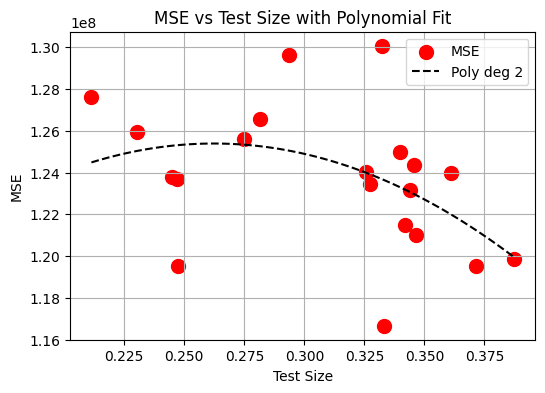

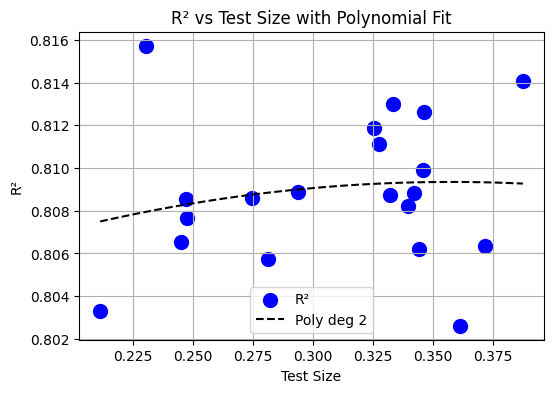

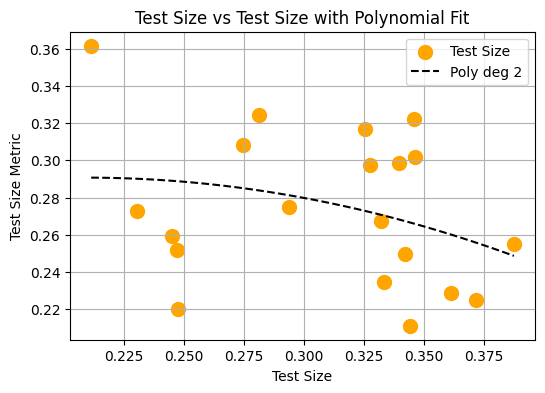

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Convert test_sizes to numpy array
x = np.array(test_sizes)

# Create polynomial degree (e.g., degree=2)
deg = 2

# --- 1. MSE plot ---
y = np.array(mse_values)
p = Polynomial.fit(x, y, deg)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = p(x_fit)

plt.figure(figsize=(6,4))
plt.scatter(x, y, color='red', s=100, label='MSE')
plt.plot(x_fit, y_fit, color='black', linestyle='--', label=f'Poly deg {deg}')
plt.xlabel("Test Size")
plt.ylabel("MSE")
plt.title("MSE vs Test Size with Polynomial Fit")
plt.legend()
plt.grid(True)
plt.show()

# --- 2. R² plot ---
y = np.array(r2_values)
p = Polynomial.fit(x, y, deg)
y_fit = p(x_fit)

plt.figure(figsize=(6,4))
plt.scatter(x, y, color='blue', s=100, label='R²')
plt.plot(x_fit, y_fit, color='black', linestyle='--', label=f'Poly deg {deg}')
plt.xlabel("Test Size")
plt.ylabel("R²")
plt.title("R² vs Test Size with Polynomial Fit")
plt.legend()
plt.grid(True)
plt.show()

# --- 3. Test Size plot ---
y = np.array(test_size)
p = Polynomial.fit(x, y, deg)
y_fit = p(x_fit)

plt.figure(figsize=(6,4))
plt.scatter(x, y, color='orange', s=100, label='Test Size')
plt.plot(x_fit, y_fit, color='black', linestyle='--', label=f'Poly deg {deg}')
plt.xlabel("Test Size")
plt.ylabel("Test Size Metric")
plt.title("Test Size vs Test Size with Polynomial Fit")
plt.legend()
plt.grid(True)
plt.show()


✅ Selected scaling method: MinMax Scaler
            MSE          RMSE             EXP (-RMSE)        R²
0  1.161204e+08  10775.917283  1.19835775057554e-4680  0.815096


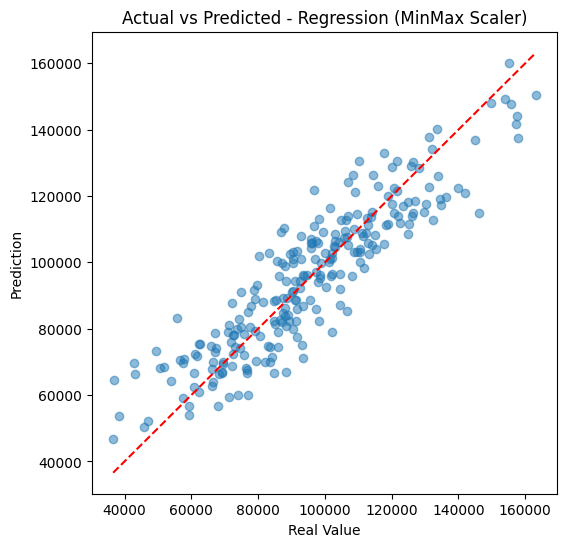

In [54]:
# נניח שהמודל נבנה עם הפונקציה create_reg_model
best_test_size = 0.24480498802315284

# קריאה לפונקציה עם test_size הכי טוב
best_model, best_mse, best_r2 = create_reg_model(
    df_1,
    ['JobTitle', 'Gender', 'Age', 'Education', 'Seniority'],
    'BasePay',
    test_size=best_test_size,
    plot=True,
    prints=True
)


In [55]:
print(best_model.get_params())

import joblib
joblib.dump(best_model, "Glassdoor_Gender_Pay_Gap.pkl")


{'memory': None, 'steps': [('preprocessor', ColumnTransformer(transformers=[('num', MinMaxScaler(), ['Age', 'Seniority']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['JobTitle', 'Gender', 'Education'])])), ('regressor', RandomForestRegressor(random_state=42))], 'verbose': False, 'preprocessor': ColumnTransformer(transformers=[('num', MinMaxScaler(), ['Age', 'Seniority']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['JobTitle', 'Gender', 'Education'])]), 'regressor': RandomForestRegressor(random_state=42), 'preprocessor__n_jobs': None, 'preprocessor__remainder': 'drop', 'preprocessor__sparse_threshold': 0.3, 'preprocessor__transformer_weights': None,

['Glassdoor_Gender_Pay_Gap.pkl']

In [56]:
df2

,id,gender,job,salary,country,age,smoking
0,1,Polygender,Pharmacist,2256.81,Serbia,50,1
1,2,Female,Sales Associate,1405.11,Portugal,35,0
2,3,Female,Account Representative II,2788.13,Chile,34,0
3,4,Male,Help Desk Technician,3493.03,Mongolia,41,1
4,5,Male,Account Representative IV,883.39,Indonesia,23,0
...,...,...,...,...,...,...,...
995,996,Male,Quality Control Specialist,2023.95,China,55,0
996,997,Male,Technical Writer,3591.37,Malta,45710,0
997,998,Male,Paralegal,3246.66,Peru,49,0
998,999,Male,Product Engineer,856.97,Gambia,33,1


In [73]:
# מילון לשמירת תוצאות
results = {}
uniqueRandom = np.random.uniform(0.05, 0.15, 20)
for ts in uniqueRandom:
    for scaleType in ['mm','r','s','n']:
        print(f'test Size - {ts} , Current Scale Type - {scaleType}')
        model, mse, r2 = create_reg_model(
            df2,
            ['gender','job','country','age','smoking'],
            'salary',
            test_size=ts,
            scaling=scaleType,
            prints=True
        )
        results[ts] = {"MSE": mse, "R2": r2 , 'Scale Type' : scaleType , 'Test Size' : ts }
print(results)

test Size - 0.14967609438713902 , Current Scale Type - mm
✅ Selected scaling method: MinMax Scaler
            MSE         RMSE            EXP (-RMSE)        R²
0  1.076175e+06  1037.388736  2.93627293389510e-451 -0.182963
test Size - 0.14967609438713902 , Current Scale Type - r
✅ Selected scaling method: Robust Scaler
            MSE         RMSE            EXP (-RMSE)        R²
0  1.076230e+06  1037.415167  2.85967936287760e-451 -0.183023
test Size - 0.14967609438713902 , Current Scale Type - s
✅ Selected scaling method: Standard Scaler
            MSE        RMSE            EXP (-RMSE)        R²
0  1.077171e+06  1037.86861  1.81714593544311e-451 -0.184058
test Size - 0.14967609438713902 , Current Scale Type - n
✅ Selected scaling method: No Scaling
            MSE         RMSE            EXP (-RMSE)        R²
0  1.077678e+06  1038.112682  1.42360858924772e-451 -0.184615
test Size - 0.06145298094296561 , Current Scale Type - mm
✅ Selected scaling method: MinMax Scaler
            MSE

In [75]:
# סינון רק תוצאות עם R² חיובי
positive_r2_keys = [k for k in results if results[k]['R2'] > 0]

if positive_r2_keys:  # אם יש לפחות אחד כזה
    best_ts = min(positive_r2_keys, key=lambda k: results[k]['MSE'])
    best_metrics = results[best_ts]

    print("Best test_size (with positive R²):", best_ts)
    print("Metrics:", best_metrics)
else:
    print("No test_size with positive R² found.")


No test_size with positive R² found.


**⚠️ Alert - R^2 negative**

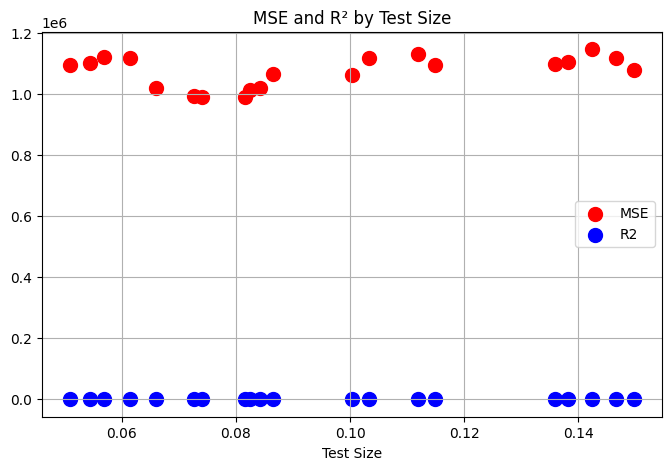

In [76]:
test_sizes = list(results.keys())
mse_values = [results[ts]['MSE'] for ts in test_sizes]
r2_values = [results[ts]['R2'] for ts in test_sizes]

plt.figure(figsize=(8,5))

# Scatter plot ל-MSE
plt.scatter(test_sizes, mse_values, color='red', label='MSE', s=100)

# Scatter plot ל-R2
plt.scatter(test_sizes, r2_values, color='blue', label='R2', s=100)

plt.xlabel("Test Size")
plt.title("MSE and R² by Test Size")
plt.legend()
plt.grid(True)
plt.show()

In [80]:
df_comp = df1.copy()
df_comp.columns = [
    'job',
    'gender',
    'age',
    'PerfEval',
    'Education',
    'Dept',
    'Seniority',
    'salary',
    'Bonus'
]

In [81]:
df_comp

,job,gender,age,PerfEval,Education,Dept,Seniority,salary,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [82]:
# מציאת עמודות משותפות
common_cols = list(set(df_comp.columns).intersection(set(df2.columns)))
print("common columns:", common_cols)

common columns: ['job', 'gender', 'salary', 'age']


In [83]:
df1_df2 = df_comp[common_cols]
df2_df1 = df2[common_cols]

In [84]:
df1_df2 

,job,gender,salary,age
0,Graphic Designer,Female,42363,18
1,Software Engineer,Male,108476,21
2,Warehouse Associate,Female,90208,19
3,Software Engineer,Male,108080,20
4,Graphic Designer,Male,99464,26
...,...,...,...,...
995,Marketing Associate,Female,62644,61
996,Data Scientist,Male,108977,57
997,Financial Analyst,Male,92347,48
998,Financial Analyst,Male,97376,65


In [85]:
df2_df1

,job,gender,salary,age
0,Pharmacist,Polygender,2256.81,50
1,Sales Associate,Female,1405.11,35
2,Account Representative II,Female,2788.13,34
3,Help Desk Technician,Male,3493.03,41
4,Account Representative IV,Male,883.39,23
...,...,...,...,...
995,Quality Control Specialist,Male,2023.95,55
996,Technical Writer,Male,3591.37,45710
997,Paralegal,Male,3246.66,49
998,Product Engineer,Male,856.97,33


In [86]:
df_combined = pd.concat([df1_df2, df2_df1], axis=0)
df_combined

,job,gender,salary,age
0,Graphic Designer,Female,42363.00,18
1,Software Engineer,Male,108476.00,21
2,Warehouse Associate,Female,90208.00,19
3,Software Engineer,Male,108080.00,20
4,Graphic Designer,Male,99464.00,26
...,...,...,...,...
995,Quality Control Specialist,Male,2023.95,55
996,Technical Writer,Male,3591.37,45710
997,Paralegal,Male,3246.66,49
998,Product Engineer,Male,856.97,33


In [89]:
for col in df_combined.columns:
    print(f"Unique values in {col}:")
    print(df_combined[col].unique())
    print("-" * 30)


Unique values in job:
['Graphic Designer' 'Software Engineer' 'Warehouse Associate' 'IT'
 'Sales Associate' 'Driver' 'Financial Analyst' 'Marketing Associate'
 'Data Scientist' 'Manager' 'Pharmacist' 'Account Representative II'
 'Help Desk Technician' 'Account Representative IV' 'Assistant Manager'
 'Accounting Assistant III' 'Staff Accountant III'
 'Physical Therapy Assistant' 'Environmental Specialist'
 'Analog Circuit Design manager' 'Professor' 'Associate Professor'
 'Nuclear Power Engineer' 'Cost Accountant' 'Registered Nurse'
 'Software Test Engineer III' 'Research Nurse'
 'Human Resources Assistant II' 'Geologist III' 'Assistant Professor'
 'Structural Analysis Engineer' 'Systems Administrator IV'
 'Quality Control Specialist' 'Mechanical Systems Engineer'
 'Technical Writer' 'Senior Cost Accountant' 'Geologist II'
 'Account Executive' 'Marketing Assistant' 'Senior Editor'
 'Assistant Media Planner' 'Clinical Specialist' 'Data Coordinator'
 'Editor' 'Financial Advisor' 'Informat

In [106]:
dfjob1 = df_combined.iloc[0:1000]
dfjob2 = df_combined.iloc[1000:1500]

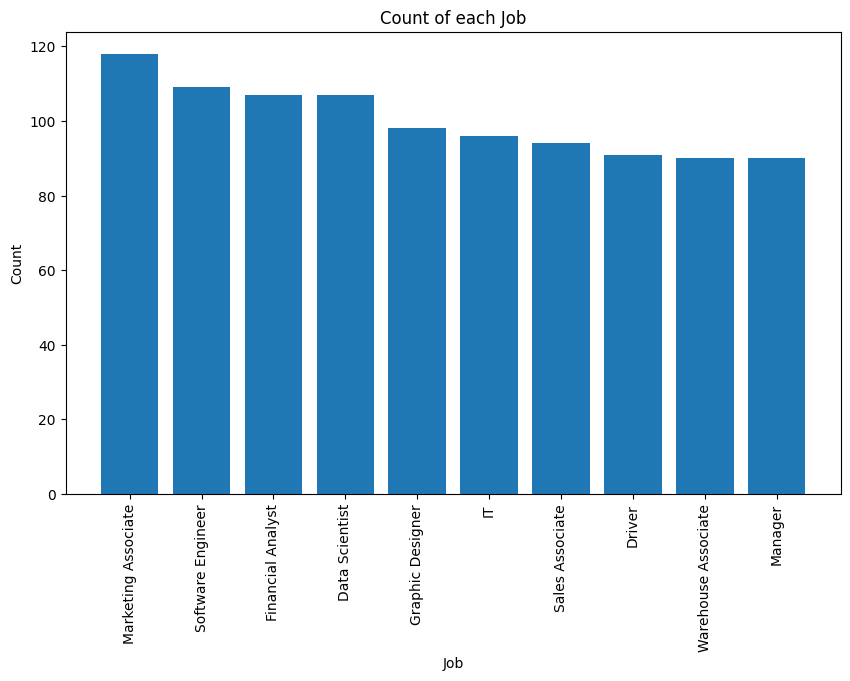

In [103]:
import matplotlib.pyplot as plt

# ספירת מופעים לכל job
counts = dfjob1['job'].value_counts()

# גרף עמודות
plt.figure(figsize=(10,6))
plt.bar(counts.index, counts.values)
plt.xlabel("Job")
plt.ylabel("Count")
plt.title("Count of each Job")
plt.xticks(rotation=90)
plt.show()


In [109]:
results = {}
for ts in [0.06,0.1]:
    for scaleType in ['mm','r','s']:
        print(f'test Size - {ts} , Current Scale Type - {scaleType}')
        model, mse, r2 = create_reg_model(
            df_combined,
            ['gender','job','age'],
            'salary',
            test_size=ts,
            scaling=scaleType,
            prints=True
        )
        results[ts] = {"MSE": mse, "R2": r2 , 'Scale Type' : scaleType , 'Test Size' : ts }
print(results)


test Size - 0.06 , Current Scale Type - mm
✅ Selected scaling method: MinMax Scaler
            MSE          RMSE             EXP (-RMSE)        R²
0  5.045799e+08  22462.856396  3.20198670797195e-9756  0.797955
test Size - 0.06 , Current Scale Type - r
✅ Selected scaling method: Robust Scaler
            MSE          RMSE             EXP (-RMSE)       R²
0  5.061908e+08  22498.684736  8.81797706566584e-9772  0.79731
test Size - 0.06 , Current Scale Type - s
✅ Selected scaling method: Standard Scaler
            MSE          RMSE             EXP (-RMSE)        R²
0  5.034745e+08  22438.236732  1.57617190436445e-9745  0.798398
test Size - 0.1 , Current Scale Type - mm
✅ Selected scaling method: MinMax Scaler
            MSE          RMSE             EXP (-RMSE)        R²
0  3.924728e+08  19810.926305  1.67503641134172e-8604  0.848757
test Size - 0.1 , Current Scale Type - r
✅ Selected scaling method: Robust Scaler
            MSE          RMSE             EXP (-RMSE)        R²
0  3.9232

In [110]:
# מציאת ה-test_size עם MSE הכי נמוך
best_ts = min(results, key=lambda k: results[k]['MSE'])
best_metrics = results[best_ts]

print("Best test_size:", best_ts)
print("Metrics:", best_metrics)

Best test_size: 0.1
Metrics: {'MSE': 393803781.3632666, 'R2': 0.8482445780290299, 'Scale Type': 's', 'Test Size': 0.1}


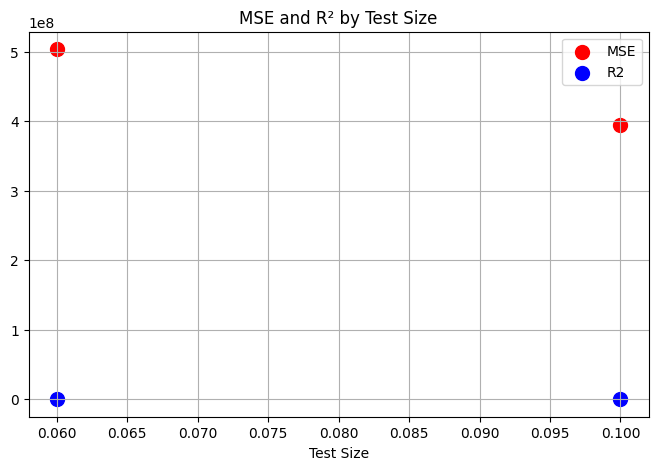

In [111]:
test_sizes = list(results.keys())
mse_values = [results[ts]['MSE'] for ts in test_sizes]
r2_values = [results[ts]['R2'] for ts in test_sizes]

plt.figure(figsize=(8,5))

# Scatter plot ל-MSE
plt.scatter(test_sizes, mse_values, color='red', label='MSE', s=100)

# Scatter plot ל-R2
plt.scatter(test_sizes, r2_values, color='blue', label='R2', s=100)

plt.xlabel("Test Size")
plt.title("MSE and R² by Test Size")
plt.legend()
plt.grid(True)
plt.show()

In [120]:
model = joblib.load('/kaggle/working/Glassdoor_Gender_Pay_Gap.pkl')
regressor = model.named_steps['regressor']

print(regressor)  
print("Number of trees:", regressor.n_estimators)
print("Max depth:", regressor.max_depth)

df_1[['JobTitle', 'Gender', 'Age', 'Education','Seniority','BasePay']]

RandomForestRegressor(random_state=42)
Number of trees: 100
Max depth: None


In [130]:
df_1.columns = df_1.columns.str.strip().str.lower()


In [138]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 78.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.5 MB/s eta 0:00:00:00:0100:01


In [152]:
# נניח שהמודל שלך הוא Pipeline
preprocessor = model.named_steps['preprocessor']

# בדיקת העמודות שה-ColumnTransformer קיבל
for name, transformer, cols in preprocessor.transformers:
    print(f"Transformer: {name}")
    print(f"Columns: {cols}")


Transformer: num
Columns: ['Age', 'Seniority']
Transformer: cat
Columns: ['JobTitle', 'Gender', 'Education']


In [146]:
ohe = preprocessor.named_transformers_['cat']  # לדוגמה
print(ohe.get_feature_names_out())

['JobTitle_Data Scientist' 'JobTitle_Driver' 'JobTitle_Financial Analyst'
 'JobTitle_Graphic Designer' 'JobTitle_IT' 'JobTitle_Manager'
 'JobTitle_Marketing Associate' 'JobTitle_Sales Associate'
 'JobTitle_Software Engineer' 'JobTitle_Warehouse Associate'
 'Gender_Female' 'Gender_Male' 'Education_College' 'Education_High School'
 'Education_Masters' 'Education_PhD']


In [147]:
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
print(feature_names)


['num__Age' 'num__Seniority' 'cat__JobTitle_Data Scientist'
 'cat__JobTitle_Driver' 'cat__JobTitle_Financial Analyst'
 'cat__JobTitle_Graphic Designer' 'cat__JobTitle_IT'
 'cat__JobTitle_Manager' 'cat__JobTitle_Marketing Associate'
 'cat__JobTitle_Sales Associate' 'cat__JobTitle_Software Engineer'
 'cat__JobTitle_Warehouse Associate' 'cat__Gender_Female'
 'cat__Gender_Male' 'cat__Education_College' 'cat__Education_High School'
 'cat__Education_Masters' 'cat__Education_PhD']


In [161]:
import pandas as pd

# התצפית שלך
pred = [14, 2, 'Driver', 'Male', 'College']

# יצירת DataFrame עם שמות העמודות המדויקים
df_pred = pd.DataFrame([pred], columns=['Age', 'Seniority', 'JobTitle', 'Gender', 'Education'])

# חיזוי
predicted_basepay = model.predict(df_pred)[0]

print(f"Predicted BasePay: ${predicted_basepay:,.2f}")


Predicted BasePay: $66,550.31


In [164]:
import gradio as gr
import pandas as pd
import joblib

# טעינת המודל
model = joblib.load('/kaggle/working/Glassdoor_Gender_Pay_Gap.pkl')

job_options = ['Data Scientist', 'Driver', 'Financial Analyst', 'Graphic Designer', 'IT',
               'Manager', 'Marketing Associate', 'Sales Associate', 'Software Engineer', 'Warehouse Associate']
gender_options = ['Male', 'Female']
education_options = ['High School', 'College', 'Masters', 'PhD']
seniority_options = ['Junior / Entry-level', 'Low-mid experience', 'Mid-level experience', 'Senior', 'Executive / Lead']

seniority_mapping = {
    "Junior / Entry-level": 1,
    "Low-mid experience": 2,
    "Mid-level experience": 3,
    "Senior": 4,
    "Executive / Lead": 5
}

def predict_basepay(jobtitle, gender, age, education, seniority):
    df_pred = pd.DataFrame([[
        age,
        seniority_mapping[seniority],
        jobtitle,
        gender,
        education
    ]], columns=['Age', 'Seniority', 'JobTitle', 'Gender', 'Education'])

    usd_to_ils = 3.41
    pred_usd = model.predict(df_pred)[0] / 12
    pred_ils = pred_usd * usd_to_ils

    return f'{pred_ils:,.2f} ₪ per Month'

# CSS מותאם אישית
custom_css = """
body {
    background-color: #f5f7fa;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
}
h1 {
    color: #1f3b73;
    text-align: center;
}
.gr-button {
    background-color: #1f3b73;
    color: white;
    border-radius: 8px;
    border: none;
}
.gr-button:hover {
    background-color: #3f5fa3;
}
"""

iface = gr.Interface(
    fn=predict_basepay,
    inputs=[
        gr.Dropdown(job_options, label="Job Title"),
        gr.Dropdown(gender_options, label="Gender"),
        gr.Number(value=30, label="Age"),
        gr.Dropdown(education_options, label="Education"),
        gr.Dropdown(seniority_options, label="Seniority")
    ],
    outputs="text",
    title="BasePay Prediction",
    css=custom_css
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7876
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://1272b0f4b405e1cbd6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
